# Preprocessing pipeline

- cleans text
- splits into train,dev,test
- fits embeddings if needed and generates embeddings
- saves files

### Import

In [4]:
import nltk
nltk.download('wordnet')
from preprocessing import *
from embeddings import *
import pickle
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/renusingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load & Clean

Importing data...
   label                                               text
0    118  Buenos Aires Playa is an urban beach on the Rí...
1    123  Contributed by Robert Lyman  © 2017The United ...
2    119  Contributed by Robert Lyman  © 2017The United ...
3    119  Share this...FacebookTwitterState parliamentar...
4    122  [CHECK OUT OUR PLANS](https://thebfd.co.nz/sub...
Size of dataframe
Index(['label', 'text'], dtype='object')
(778, 2)

Dropping na values..
NaN values per column
label     0
text     62
dtype: int64

Encoding classes..
118 is encoded to [0]
119 is encoded to [1]
120 is encoded to [2]

Filtering long doocuments and exploring length..
Article length distributon
count     628.000000
mean      704.353503
std       524.516163
min        66.000000
25%       390.000000
50%       651.500000
75%       861.000000
max      4674.000000
Name: text_length, dtype: float64
Histogram lens of articles


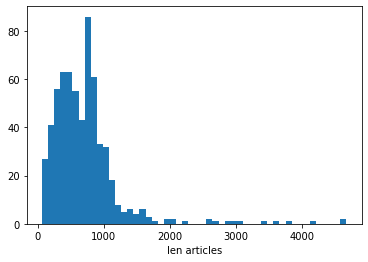

Article length distributon
count     599.000000
mean      620.439065
std       299.411590
min        66.000000
25%       384.000000
50%       602.000000
75%       824.000000
max      1484.000000
Name: text_length, dtype: float64
Histogram lens of articles


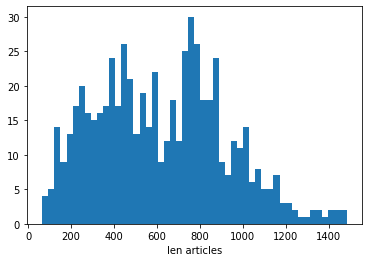


Starting text preprocessing..
628


,text,human_label,text_length,clean_text
0,Buenos Aires Playa is an urban beach on the Rí...,0,408,"[buenos, aire, playa, urban, beach, ro, de, la..."
2,Contributed by Robert Lyman © 2017The United ...,1,1591,"[contribute, robert, lyman, unite, kingdom, fi..."
3,Share this...FacebookTwitterState parliamentar...,1,598,"[thisfacebooktwitterstate, parliamentarian, wo..."
5,"On April 7, I wrote about global warming “hoth...",0,666,"[april, write, global, warm, hothead, dominate..."
6,From PragerU\nHas environmentalism become more...,2,124,"[prageru, environmentalism, become, good, fait..."


In [2]:
path = '../labelled_data/labelled_data_14032021.csv'

print("Importing data...")
df = import_data(path)

print("\nDropping na values..")
df = na_values(df)

print("\nEncoding classes..")
df = class_encoding(df)

print("\nFiltering long doocuments and exploring length..")
documents_len_exploration_and_filter(df,max_len=1500)

print("\nStarting text preprocessing..")
clean_text = preprocessing(df)

df['clean_text'] = clean_text

print(len(df))
df.head()

### Split data

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)

print("Training shape ", train_df.shape)
print("Test shape ", test_df.shape)

print("Training target distributions ")
print(train_df['human_label'].value_counts())
print("Test target distributions ")
print(test_df['human_label'].value_counts())

Training shape  (502, 4)
Test shape  (126, 4)
Training target distributions 
0    199
2    175
1    128
Name: human_label, dtype: int64
Test target distributions 
2    46
0    45
1    35
Name: human_label, dtype: int64


### Generate & Save Embeddings

##### Word2Vec

In [6]:
w2v_model = Word2VecVectorizerClass()
w2v_model.fit(None) # Just loads already trained Word2Vec model, no fitting

word2vec_embedded_train_df = w2v_model.run(train_df,label_column='human_label')
w2v_model.print_debug_info()
word2vec_embedded_test_df = w2v_model.run(test_df,label_column='human_label')
w2v_model.print_debug_info()

print(word2vec_embedded_train_df.shape)
print(word2vec_embedded_test_df.shape)

words not found  9261
words found  187739
% of words not found  4.701015228426396
words not found  2105
words found  50122
% of words not found  4.030482317575201
(502, 301)
(126, 301)


In [7]:
word2vec_embedded_train_df.to_csv('../labelled_data/embedded_data/word2vec/train.csv')
word2vec_embedded_test_df.to_csv('../labelled_data/embedded_data/word2vec/test.csv')

#### NormBow

In [8]:
normbow = NormBowVectorizerClass()
normbow.fit(train_df)
normbow.save(pickle_path="./saved_vectorizers/NormBow_vectorizer.pkl")

normbow_embedded_train_df = normbow.run(train_df,label_column='human_label')
normbow_embedded_test_df = normbow.run(test_df,label_column='human_label')


print(normbow_embedded_train_df.shape)
print(normbow_embedded_test_df.shape)

(502, 16743)
(126, 16743)


In [9]:
normbow.print_debug_info()

Vocab length: 16742


In [10]:
normbow_embedded_train_df.to_csv('../labelled_data/embedded_data/normbow/train.csv')
normbow_embedded_test_df.to_csv('../labelled_data/embedded_data/normbow/test.csv')

#### TfIdfVectrizer

In [11]:
tfidf = TfIdfVectorizerClass()
tfidf.fit(train_df)
tfidf.save(pickle_path="./saved_vectorizers/TfIdf_vectorizer.pkl")

tfidf_embedded_train_df = tfidf.run(train_df,label_column='human_label')
tfidf_embedded_test_df = tfidf.run(test_df,label_column='human_label')


print(tfidf_embedded_train_df.shape)
print(tfidf_embedded_test_df.shape)

(502, 3967)
(126, 3967)


In [12]:
tfidf.print_debug_info()

Vocab length: 3966


In [13]:
tfidf_embedded_train_df.to_csv('../labelled_data/embedded_data/tfidf/train.csv')
tfidf_embedded_test_df.to_csv('../labelled_data/embedded_data/tfidf/test.csv')